# Fetching and plot data from the VIEWS API

This notebook allows users to fetch and download large data from the VIEWS API, uninhibited by the API's page limit. 

No certificates/special access tokens are required. 

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from views_mapper2.label_writer import *

In [2]:
import os
home = os.path.expanduser("~")

## Define the dataset of interest

Please consult https://github.com/prio-data/views_api for guidance. 

In [3]:
# Define the URL you want to fetch data from. Please consult https://github.com/prio-data/views_api to learn more about filtering out the data of interest and creating the corresponding URL. 

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2022_08_t01/cm?iso=SDN'
#VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_01_t01/cm/sb/sc_cm_sb_main?iso=KEN'

## Definitions for text in the plot

In [4]:
country_name = 'Sudan'

In [5]:
LastInputData = 'Aug 2022'

In [6]:
Dataset = 'fatalities001_2022_08'

In [7]:
StartOfHistory = 'Sept 2022'
EndOfHistory =  'Aug 2025'

## Static functions

No need to edit this section. 

In [8]:
# Request function
r = requests.get(VIEWS_URL)

In [9]:
#The set page size 
PAGE_SIZE=1000

In [10]:
#Define the full request 
req_url=VIEWS_URL #+'/'+str()+'?'+'pagesize='+str(PAGE_SIZE)
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

In [11]:
list(page_data)

['next_page',
 'prev_page',
 'model_tree',
 'models',
 'row_count',
 'page_count',
 'page_cur',
 'start_date',
 'end_date',
 'data']

In [12]:
# The loop to keep fetching pages until all data is accessed 

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df1=pd.DataFrame(master_list)

## Inspect the data

In [13]:
# Inspect the data to see that it looks correct

df1

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_surrogate_pop,sc_cm_sb_dich_main,sc_cm_sb_main,sc_cm_sb_surrogate_ch,sc_cm_sb_surrogate_nch,sc_cm_sb_surrogate_dem,sc_cm_sb_surrogate_imr,sc_cm_sb_surrogate_topic10
0,245,513,Sudan,625,SDN,2022,9,1.2981,0.0180,1.0969,2.0317,2.0026,1.0719,0.8378,0.8933
1,245,514,Sudan,625,SDN,2022,10,1.3952,0.0184,1.1763,2.2174,2.2182,1.1765,0.9007,0.9920
2,245,515,Sudan,625,SDN,2022,11,1.4732,0.0396,1.6838,2.3741,2.3297,1.2399,0.9610,1.0449
3,245,516,Sudan,625,SDN,2022,12,1.4803,0.0252,1.3765,2.4286,2.4179,1.2486,0.9554,1.0675
4,245,517,Sudan,625,SDN,2023,1,1.4827,0.0386,1.6821,2.4731,2.4932,1.2553,0.9561,1.0856
5,245,518,Sudan,625,SDN,2023,2,1.5522,0.0296,1.4956,2.5199,2.5529,1.3099,0.9895,1.0917
6,245,519,Sudan,625,SDN,2023,3,1.5229,0.0347,1.5831,2.4581,2.6249,1.3016,0.9748,1.0683
7,245,520,Sudan,625,SDN,2023,4,1.5181,0.0371,1.6193,2.4300,2.6570,1.3177,0.9829,1.0705
8,245,521,Sudan,625,SDN,2023,5,1.5715,0.0427,1.7023,2.4533,2.8083,1.3619,1.0206,1.0798
9,245,522,Sudan,625,SDN,2023,6,1.5269,0.0392,1.6448,2.4513,2.7227,1.3240,0.9835,1.0499


## Filter by period

In [14]:
# Call the function

#def vid2date(i):
#    year=str(1980 + i//12)
#    month=str(i%12)
#    return year+'/'+month

In [15]:
# Translate year-month to VIEWS month ID

#print(ViewsMonth.from_year_month(year=2022, month=8)) 

In [16]:
# df_filtered = df.query('month_id > 500')


In [17]:
# df_filtered

## For *fatalities001*: convert results from logged to non-logged

In [18]:
df1[f'{Dataset}'] = np.exp(df1['sc_cm_sb_main'])-1
df1['Date'] = df1['year'].astype(str) +'-'+ df1['month'].astype(str)
df1

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_surrogate_pop,sc_cm_sb_dich_main,sc_cm_sb_main,sc_cm_sb_surrogate_ch,sc_cm_sb_surrogate_nch,sc_cm_sb_surrogate_dem,sc_cm_sb_surrogate_imr,sc_cm_sb_surrogate_topic10,fatalities001_2022_08,Date
0,245,513,Sudan,625,SDN,2022,9,1.2981,0.0180,1.0969,2.0317,2.0026,1.0719,0.8378,0.8933,1.994868,2022-9
1,245,514,Sudan,625,SDN,2022,10,1.3952,0.0184,1.1763,2.2174,2.2182,1.1765,0.9007,0.9920,2.242355,2022-10
2,245,515,Sudan,625,SDN,2022,11,1.4732,0.0396,1.6838,2.3741,2.3297,1.2399,0.9610,1.0449,4.385984,2022-11
3,245,516,Sudan,625,SDN,2022,12,1.4803,0.0252,1.3765,2.4286,2.4179,1.2486,0.9554,1.0675,2.961014,2022-12
4,245,517,Sudan,625,SDN,2023,1,1.4827,0.0386,1.6821,2.4731,2.4932,1.2553,0.9561,1.0856,4.376835,2023-1
5,245,518,Sudan,625,SDN,2023,2,1.5522,0.0296,1.4956,2.5199,2.5529,1.3099,0.9895,1.0917,3.462013,2023-2
6,245,519,Sudan,625,SDN,2023,3,1.5229,0.0347,1.5831,2.4581,2.6249,1.3016,0.9748,1.0683,3.870030,2023-3
7,245,520,Sudan,625,SDN,2023,4,1.5181,0.0371,1.6193,2.4300,2.6570,1.3177,0.9829,1.0705,4.049554,2023-4
8,245,521,Sudan,625,SDN,2023,5,1.5715,0.0427,1.7023,2.4533,2.8083,1.3619,1.0206,1.0798,4.486552,2023-5
9,245,522,Sudan,625,SDN,2023,6,1.5269,0.0392,1.6448,2.4513,2.7227,1.3240,0.9835,1.0499,4.179974,2023-6


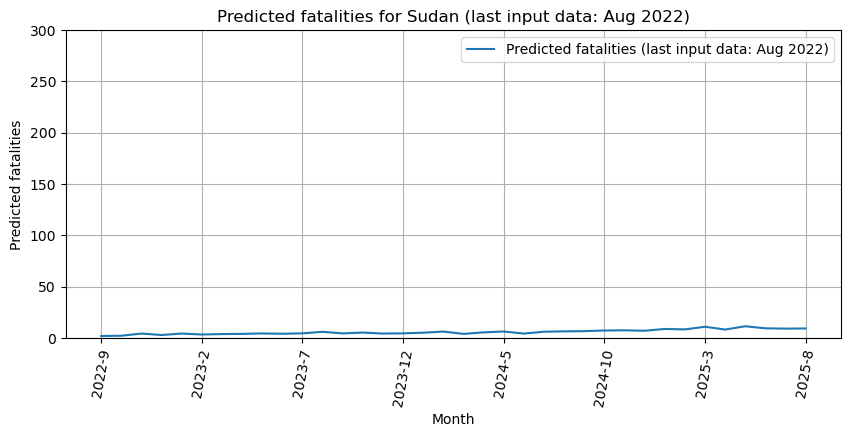

In [19]:
# Create the line graph
df1.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

## Df2

In [20]:
LastInputData = 'Sep 2022'
Dataset = 'fatalities001_2022_09'
StartOfHistory = 'Oct 2022'
EndOfHistory =  'Sep 2025'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2022_09_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df2=pd.DataFrame(master_list)
df2

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,514,Sudan,625,SDN,2022,10,1.4150
1,245,515,Sudan,625,SDN,2022,11,1.4179
2,245,516,Sudan,625,SDN,2022,12,1.6973
3,245,517,Sudan,625,SDN,2023,1,1.4371
4,245,518,Sudan,625,SDN,2023,2,1.5993
5,245,519,Sudan,625,SDN,2023,3,1.7705
6,245,520,Sudan,625,SDN,2023,4,1.7523
7,245,521,Sudan,625,SDN,2023,5,1.7350
8,245,522,Sudan,625,SDN,2023,6,1.6477
9,245,523,Sudan,625,SDN,2023,7,1.7812


In [21]:
df2[f'{Dataset}'] = np.exp(df2['sc_cm_sb_main'])-1
df2['Date'] = df2['year'].astype(str) +'-'+ df2['month'].astype(str)
df2

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2022_09,Date
0,245,514,Sudan,625,SDN,2022,10,1.4150,3.116486,2022-10
1,245,515,Sudan,625,SDN,2022,11,1.4179,3.128442,2022-11
2,245,516,Sudan,625,SDN,2022,12,1.6973,4.459188,2022-12
3,245,517,Sudan,625,SDN,2023,1,1.4371,3.208474,2023-1
4,245,518,Sudan,625,SDN,2023,2,1.5993,3.949567,2023-2
5,245,519,Sudan,625,SDN,2023,3,1.7705,4.873790,2023-3
6,245,520,Sudan,625,SDN,2023,4,1.7523,4.767853,2023-4
7,245,521,Sudan,625,SDN,2023,5,1.7350,4.668928,2023-5
8,245,522,Sudan,625,SDN,2023,6,1.6477,4.195018,2023-6
9,245,523,Sudan,625,SDN,2023,7,1.7812,4.936977,2023-7


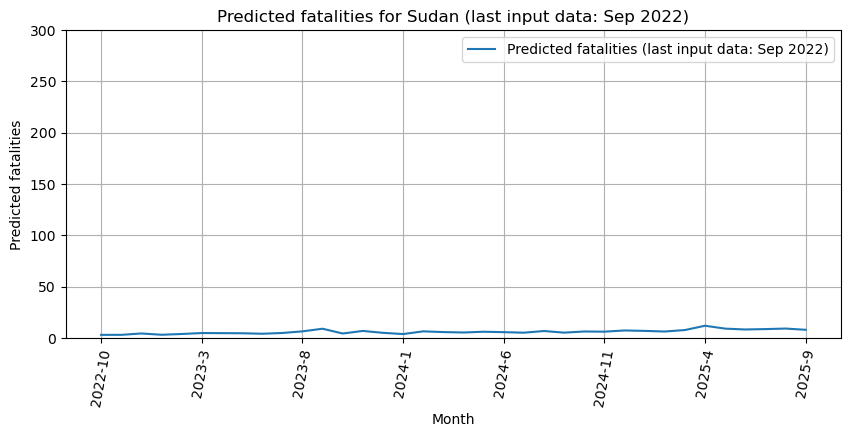

In [22]:
# Create the line graph
df2.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

## Df3

In [23]:
LastInputData = 'Oct 2022'
Dataset = 'fatalities001_2022_10'
StartOfHistory = 'Nov 2022'
EndOfHistory =  'Oct 2025'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2022_10_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df3=pd.DataFrame(master_list)
df3

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,515,Sudan,625,SDN,2022,11,1.3571
1,245,516,Sudan,625,SDN,2022,12,1.3780
2,245,517,Sudan,625,SDN,2023,1,1.5476
3,245,518,Sudan,625,SDN,2023,2,1.4538
4,245,519,Sudan,625,SDN,2023,3,1.5831
5,245,520,Sudan,625,SDN,2023,4,1.6590
6,245,521,Sudan,625,SDN,2023,5,1.8188
7,245,522,Sudan,625,SDN,2023,6,1.7846
8,245,523,Sudan,625,SDN,2023,7,1.6886
9,245,524,Sudan,625,SDN,2023,8,1.8585


In [24]:
df3[f'{Dataset}'] = np.exp(df3['sc_cm_sb_main'])-1
df3['Date'] = df2['year'].astype(str) +'-'+ df3['month'].astype(str)
df3

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2022_10,Date
0,245,515,Sudan,625,SDN,2022,11,1.3571,2.884911,2022-11
1,245,516,Sudan,625,SDN,2022,12,1.3780,2.966960,2022-12
2,245,517,Sudan,625,SDN,2023,1,1.5476,3.700176,2022-1
3,245,518,Sudan,625,SDN,2023,2,1.4538,3.279345,2023-2
4,245,519,Sudan,625,SDN,2023,3,1.5831,3.870030,2023-3
5,245,520,Sudan,625,SDN,2023,4,1.6590,4.254054,2023-4
6,245,521,Sudan,625,SDN,2023,5,1.8188,5.164457,2023-5
7,245,522,Sudan,625,SDN,2023,6,1.7846,4.957197,2023-6
8,245,523,Sudan,625,SDN,2023,7,1.6886,4.411899,2023-7
9,245,524,Sudan,625,SDN,2023,8,1.8585,5.414108,2023-8


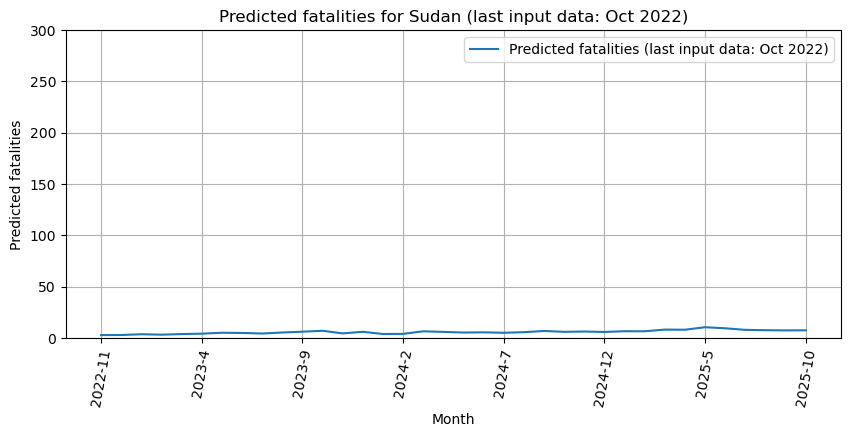

In [25]:
# Create the line graph
df3.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

## Df4

In [26]:
LastInputData = 'Nov 2022'
Dataset = 'fatalities001_2022_11'
StartOfHistory = 'Dec 2022'
EndOfHistory =  'Nov 2025'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2022_11_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df4=pd.DataFrame(master_list)
df4

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,516,Sudan,625,SDN,2022,12,1.6282
1,245,517,Sudan,625,SDN,2023,1,1.7421
2,245,518,Sudan,625,SDN,2023,2,1.7997
3,245,519,Sudan,625,SDN,2023,3,1.7813
4,245,520,Sudan,625,SDN,2023,4,1.9593
5,245,521,Sudan,625,SDN,2023,5,1.8825
6,245,522,Sudan,625,SDN,2023,6,1.8606
7,245,523,Sudan,625,SDN,2023,7,1.9836
8,245,524,Sudan,625,SDN,2023,8,1.8943
9,245,525,Sudan,625,SDN,2023,9,1.9575


In [27]:
df4[f'{Dataset}'] = np.exp(df4['sc_cm_sb_main'])-1
df4['Date'] = df4['year'].astype(str) +'-'+ df4['month'].astype(str)
df4

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2022_11,Date
0,245,516,Sudan,625,SDN,2022,12,1.6282,4.094696,2022-12
1,245,517,Sudan,625,SDN,2023,1,1.7421,4.709320,2023-1
2,245,518,Sudan,625,SDN,2023,2,1.7997,5.047833,2023-2
3,245,519,Sudan,625,SDN,2023,3,1.7813,4.937570,2023-3
4,245,520,Sudan,625,SDN,2023,4,1.9593,6.094359,2023-4
5,245,521,Sudan,625,SDN,2023,5,1.8825,5.569909,2023-5
6,245,522,Sudan,625,SDN,2023,6,1.8606,5.427592,2023-6
7,245,523,Sudan,625,SDN,2023,7,1.9836,6.268864,2023-7
8,245,524,Sudan,625,SDN,2023,8,1.8943,5.647893,2023-8
9,245,525,Sudan,625,SDN,2023,9,1.9575,6.081601,2023-9


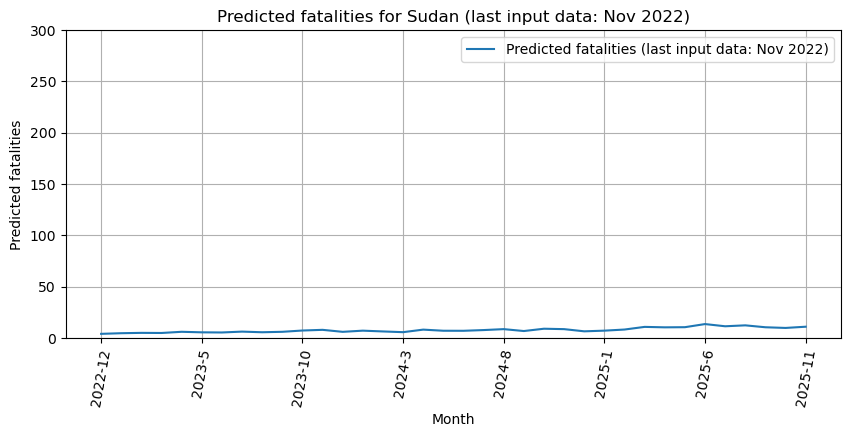

In [28]:
# Create the line graph
df4.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

## Df5

In [29]:
LastInputData = 'Dec 2022'
Dataset = 'fatalities001_2022_12'
StartOfHistory = 'Jan 2023'
EndOfHistory =  'Dec 2025'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_00_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df5=pd.DataFrame(master_list)
df5

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,517,Sudan,625,SDN,2023,1,1.4706
1,245,518,Sudan,625,SDN,2023,2,1.4645
2,245,519,Sudan,625,SDN,2023,3,1.6401
3,245,520,Sudan,625,SDN,2023,4,1.5681
4,245,521,Sudan,625,SDN,2023,5,1.8749
5,245,522,Sudan,625,SDN,2023,6,1.8344
6,245,523,Sudan,625,SDN,2023,7,1.6763
7,245,524,Sudan,625,SDN,2023,8,1.8715
8,245,525,Sudan,625,SDN,2023,9,1.9314
9,245,526,Sudan,625,SDN,2023,10,1.8650


In [30]:
df5[f'{Dataset}'] = np.exp(df5['sc_cm_sb_main'])-1
df5['Date'] = df5['year'].astype(str) +'-'+ df5['month'].astype(str)
df5

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2022_12,Date
0,245,517,Sudan,625,SDN,2023,1,1.4706,3.351845,2023-1
1,245,518,Sudan,625,SDN,2023,2,1.4645,3.325380,2023-2
2,245,519,Sudan,625,SDN,2023,3,1.6401,4.155685,2023-3
3,245,520,Sudan,625,SDN,2023,4,1.5681,3.797524,2023-4
4,245,521,Sudan,625,SDN,2023,5,1.8749,5.520167,2023-5
5,245,522,Sudan,625,SDN,2023,6,1.8344,5.261376,2023-6
6,245,523,Sudan,625,SDN,2023,7,1.6763,4.345740,2023-7
7,245,524,Sudan,625,SDN,2023,8,1.8715,5.498036,2023-8
8,245,525,Sudan,625,SDN,2023,9,1.9314,5.899162,2023-9
9,245,526,Sudan,625,SDN,2023,10,1.8650,5.455936,2023-10


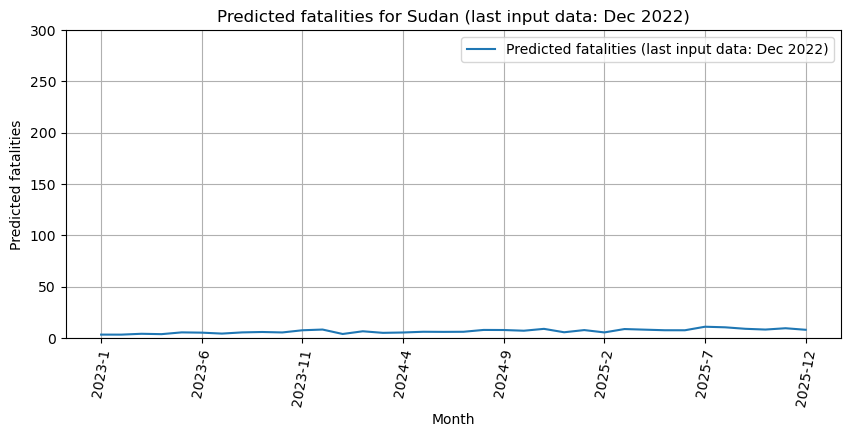

In [31]:
# Create the line graph
df5.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [32]:
## Df6

In [33]:
LastInputData = 'Jan 2023'
Dataset = 'fatalities001_2023_01'
StartOfHistory = 'Feb 2023'
EndOfHistory =  'Jan 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_01_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df6=pd.DataFrame(master_list)
df6

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,518,Sudan,625,SDN,2023,2,1.4196
1,245,519,Sudan,625,SDN,2023,3,1.3127
2,245,520,Sudan,625,SDN,2023,4,1.5228
3,245,521,Sudan,625,SDN,2023,5,1.5962
4,245,522,Sudan,625,SDN,2023,6,1.8176
5,245,523,Sudan,625,SDN,2023,7,1.7512
6,245,524,Sudan,625,SDN,2023,8,1.8895
7,245,525,Sudan,625,SDN,2023,9,1.9201
8,245,526,Sudan,625,SDN,2023,10,1.8217
9,245,527,Sudan,625,SDN,2023,11,1.9824


In [34]:
df6[f'{Dataset}'] = np.exp(df6['sc_cm_sb_main'])-1
df6['Date'] = df6['year'].astype(str) +'-'+ df6['month'].astype(str)
df6

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2023_01,Date
0,245,518,Sudan,625,SDN,2023,2,1.4196,3.135466,2023-2
1,245,519,Sudan,625,SDN,2023,3,1.3127,2.716194,2023-3
2,245,520,Sudan,625,SDN,2023,4,1.5228,3.585045,2023-4
3,245,521,Sudan,625,SDN,2023,5,1.5962,3.934247,2023-5
4,245,522,Sudan,625,SDN,2023,6,1.8176,5.157064,2023-6
5,245,523,Sudan,625,SDN,2023,7,1.7512,4.761512,2023-7
6,245,524,Sudan,625,SDN,2023,8,1.8895,5.616060,2023-8
7,245,525,Sudan,625,SDN,2023,9,1.9201,5.821641,2023-9
8,245,526,Sudan,625,SDN,2023,10,1.8217,5.182360,2023-10
9,245,527,Sudan,625,SDN,2023,11,1.9824,6.260146,2023-11


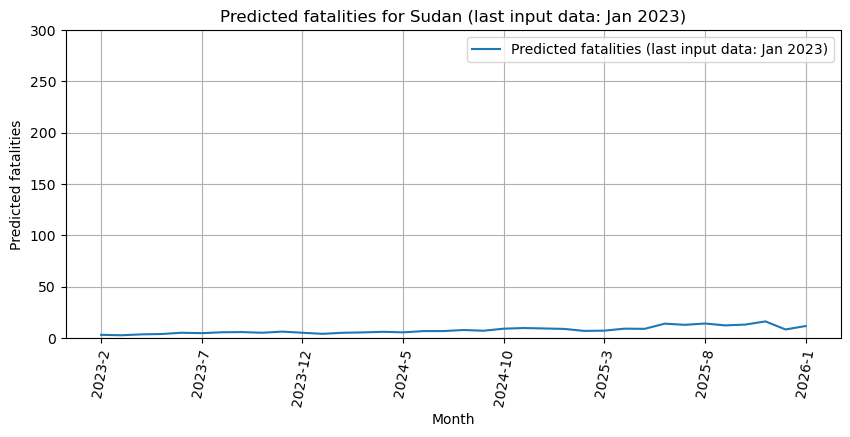

In [35]:
# Create the line graph
df6.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [36]:
## Df7

In [37]:
LastInputData = 'Feb 2023'
Dataset = 'fatalities002_2023_02'
StartOfHistory = 'Mar 2023'
EndOfHistory =  'Feb 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_02_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df7=pd.DataFrame(master_list)
df7

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,519,Sudan,625,SDN,2023,3,1.2153
1,245,520,Sudan,625,SDN,2023,4,1.2815
2,245,521,Sudan,625,SDN,2023,5,1.3586
3,245,522,Sudan,625,SDN,2023,6,1.5579
4,245,523,Sudan,625,SDN,2023,7,1.5284
5,245,524,Sudan,625,SDN,2023,8,1.6987
6,245,525,Sudan,625,SDN,2023,9,1.6482
7,245,526,Sudan,625,SDN,2023,10,1.5469
8,245,527,Sudan,625,SDN,2023,11,1.6856
9,245,528,Sudan,625,SDN,2023,12,1.4565


In [38]:
df7[f'{Dataset}'] = np.exp(df7['sc_cm_sb_main'])-1
df7['Date'] = df7['year'].astype(str) +'-'+ df7['month'].astype(str)
df7

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities002_2023_02,Date
0,245,519,Sudan,625,SDN,2023,3,1.2153,2.371305,2023-3
1,245,520,Sudan,625,SDN,2023,4,1.2815,2.602039,2023-4
2,245,521,Sudan,625,SDN,2023,5,1.3586,2.890742,2023-5
3,245,522,Sudan,625,SDN,2023,6,1.5579,3.748838,2023-6
4,245,523,Sudan,625,SDN,2023,7,1.5284,3.610794,2023-7
5,245,524,Sudan,625,SDN,2023,8,1.6987,4.466836,2023-8
6,245,525,Sudan,625,SDN,2023,9,1.6482,4.197616,2023-9
7,245,526,Sudan,625,SDN,2023,10,1.5469,3.696887,2023-10
8,245,527,Sudan,625,SDN,2023,11,1.6856,4.395687,2023-11
9,245,528,Sudan,625,SDN,2023,12,1.4565,3.290915,2023-12


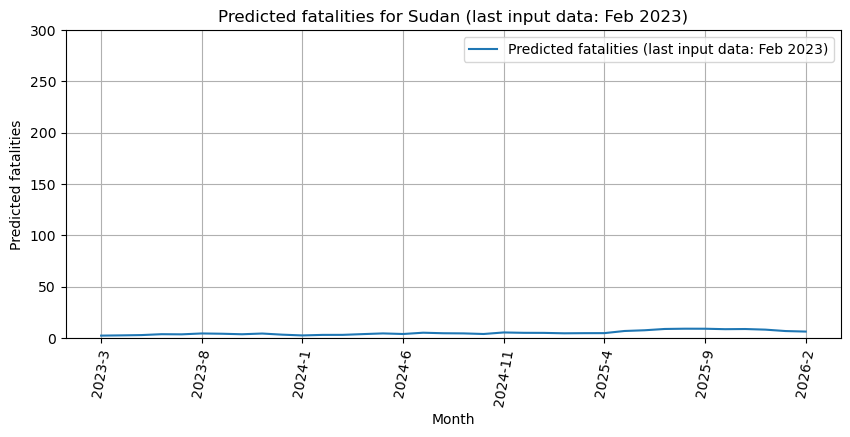

In [39]:
# Create the line graph
df7.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [40]:
## Df8

In [41]:
LastInputData = 'Mar 2023'
Dataset = 'fatalities001_2023_03'
StartOfHistory = 'Apr 2023'
EndOfHistory =  'Mar 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_03_t01/cm/sb/sc_cm_sb_main?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df8=pd.DataFrame(master_list)
df8

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,245,520,Sudan,625,SDN,2023,4,1.0357
1,245,521,Sudan,625,SDN,2023,5,0.9605
2,245,522,Sudan,625,SDN,2023,6,1.2490
3,245,523,Sudan,625,SDN,2023,7,1.3664
4,245,524,Sudan,625,SDN,2023,8,1.3066
5,245,525,Sudan,625,SDN,2023,9,1.3563
6,245,526,Sudan,625,SDN,2023,10,1.3993
7,245,527,Sudan,625,SDN,2023,11,1.4552
8,245,528,Sudan,625,SDN,2023,12,1.3036
9,245,529,Sudan,625,SDN,2024,1,1.2593


In [42]:
df8[f'{Dataset}'] = np.exp(df8['sc_cm_sb_main'])-1
df8['Date'] = df8['year'].astype(str) +'-'+ df8['month'].astype(str)
df8

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,fatalities001_2023_03,Date
0,245,520,Sudan,625,SDN,2023,4,1.0357,1.817077,2023-4
1,245,521,Sudan,625,SDN,2023,5,0.9605,1.613003,2023-5
2,245,522,Sudan,625,SDN,2023,6,1.2490,2.486854,2023-6
3,245,523,Sudan,625,SDN,2023,7,1.3664,2.921209,2023-7
4,245,524,Sudan,625,SDN,2023,8,1.3066,2.693594,2023-8
5,245,525,Sudan,625,SDN,2023,9,1.3563,2.881804,2023-9
6,245,526,Sudan,625,SDN,2023,10,1.3993,3.052362,2023-10
7,245,527,Sudan,625,SDN,2023,11,1.4552,3.285340,2023-11
8,245,528,Sudan,625,SDN,2023,12,1.3036,2.682530,2023-12
9,245,529,Sudan,625,SDN,2024,1,1.2593,2.522955,2024-1


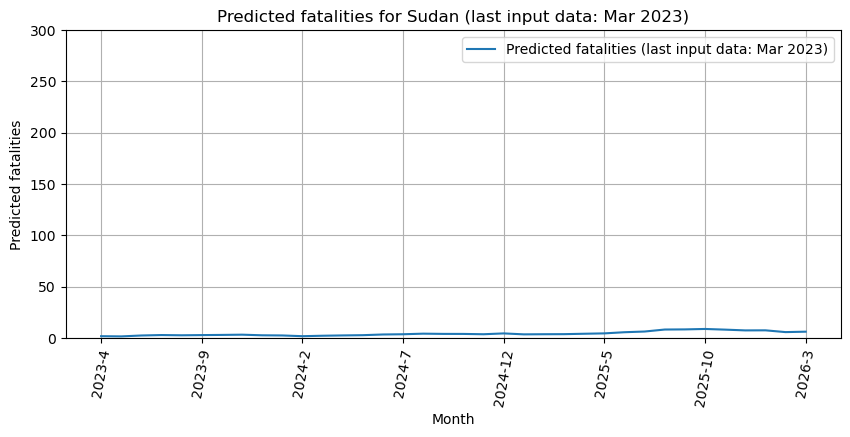

In [43]:
# Create the line graph
df8.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [44]:
## Df9

In [45]:
LastInputData = 'Apr 2023'
Dataset = 'fatalities002_2023_04'
StartOfHistory = 'May 2023'
EndOfHistory =  'Apr 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_04_t01/cm/sb/main_mean?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df9=pd.DataFrame(master_list)
df9

,country_id,month_id,name,gwcode,isoab,year,month,main_mean
0,245,521,Sudan,625,SDN,2023,5,19.1108
1,245,522,Sudan,625,SDN,2023,6,11.3960
2,245,523,Sudan,625,SDN,2023,7,7.9309
3,245,524,Sudan,625,SDN,2023,8,4.7140
4,245,525,Sudan,625,SDN,2023,9,6.2560
5,245,526,Sudan,625,SDN,2023,10,6.6429
6,245,527,Sudan,625,SDN,2023,11,10.8224
7,245,528,Sudan,625,SDN,2023,12,9.5548
8,245,529,Sudan,625,SDN,2024,1,7.5252
9,245,530,Sudan,625,SDN,2024,2,6.3341


In [46]:
df9[f'{Dataset}'] = df9['main_mean']
df9['Date'] = df9['year'].astype(str) +'-'+ df9['month'].astype(str)
df9

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,fatalities002_2023_04,Date
0,245,521,Sudan,625,SDN,2023,5,19.1108,19.1108,2023-5
1,245,522,Sudan,625,SDN,2023,6,11.3960,11.3960,2023-6
2,245,523,Sudan,625,SDN,2023,7,7.9309,7.9309,2023-7
3,245,524,Sudan,625,SDN,2023,8,4.7140,4.7140,2023-8
4,245,525,Sudan,625,SDN,2023,9,6.2560,6.2560,2023-9
5,245,526,Sudan,625,SDN,2023,10,6.6429,6.6429,2023-10
6,245,527,Sudan,625,SDN,2023,11,10.8224,10.8224,2023-11
7,245,528,Sudan,625,SDN,2023,12,9.5548,9.5548,2023-12
8,245,529,Sudan,625,SDN,2024,1,7.5252,7.5252,2024-1
9,245,530,Sudan,625,SDN,2024,2,6.3341,6.3341,2024-2


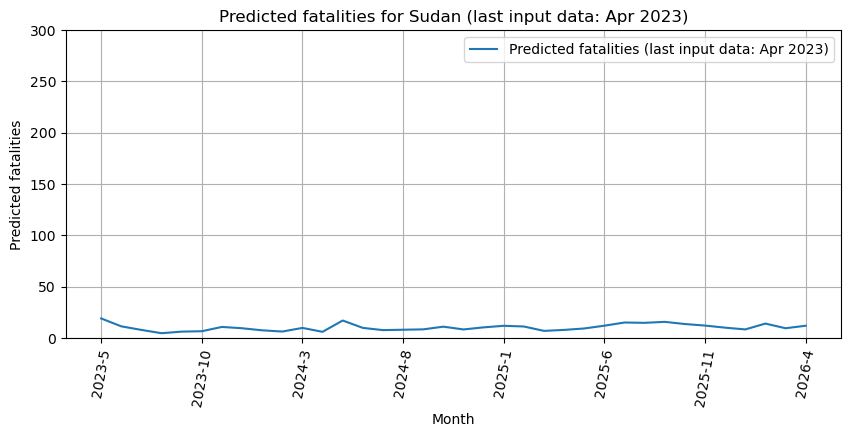

In [47]:
# Create the line graph
df9.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [48]:
## Df10

In [49]:
LastInputData = 'May 2023'
Dataset = 'fatalities002_2023_05'
StartOfHistory = 'Jun 2023'
EndOfHistory =  'May 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_05_t01/cm/sb/main_mean?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df10=pd.DataFrame(master_list)
df10

,country_id,month_id,name,gwcode,isoab,year,month,main_mean
0,245,522,Sudan,625,SDN,2023,6,137.8525
1,245,523,Sudan,625,SDN,2023,7,112.5659
2,245,524,Sudan,625,SDN,2023,8,46.1906
3,245,525,Sudan,625,SDN,2023,9,59.8670
4,245,526,Sudan,625,SDN,2023,10,36.0144
5,245,527,Sudan,625,SDN,2023,11,37.1302
6,245,528,Sudan,625,SDN,2023,12,23.2071
7,245,529,Sudan,625,SDN,2024,1,17.0962
8,245,530,Sudan,625,SDN,2024,2,16.9035
9,245,531,Sudan,625,SDN,2024,3,21.2989


In [50]:
df10[f'{Dataset}'] = df10['main_mean']
df10['Date'] = df2['year'].astype(str) +'-'+ df10['month'].astype(str)
df10

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,fatalities002_2023_05,Date
0,245,522,Sudan,625,SDN,2023,6,137.8525,137.8525,2022-6
1,245,523,Sudan,625,SDN,2023,7,112.5659,112.5659,2022-7
2,245,524,Sudan,625,SDN,2023,8,46.1906,46.1906,2022-8
3,245,525,Sudan,625,SDN,2023,9,59.8670,59.8670,2023-9
4,245,526,Sudan,625,SDN,2023,10,36.0144,36.0144,2023-10
5,245,527,Sudan,625,SDN,2023,11,37.1302,37.1302,2023-11
6,245,528,Sudan,625,SDN,2023,12,23.2071,23.2071,2023-12
7,245,529,Sudan,625,SDN,2024,1,17.0962,17.0962,2023-1
8,245,530,Sudan,625,SDN,2024,2,16.9035,16.9035,2023-2
9,245,531,Sudan,625,SDN,2024,3,21.2989,21.2989,2023-3


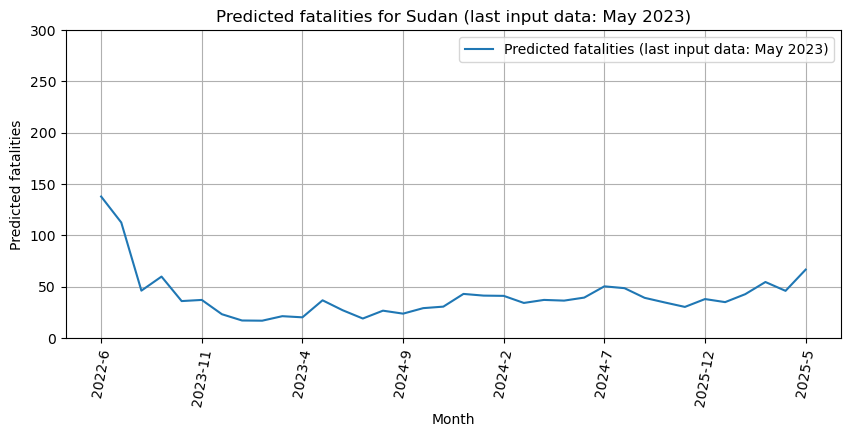

In [51]:
# Create the line graph
df10.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [52]:
## Df11

In [53]:
LastInputData = 'June 2023'
Dataset = 'fatalities002_2023_06'
StartOfHistory = 'Jul 2023'
EndOfHistory =  'Jun 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_06_t01/cm/sb/main_mean?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df11=pd.DataFrame(master_list)
df11

,country_id,month_id,name,gwcode,isoab,year,month,main_mean
0,245,523,Sudan,625,SDN,2023,7,213.0025
1,245,524,Sudan,625,SDN,2023,8,221.5648
2,245,525,Sudan,625,SDN,2023,9,95.8364
3,245,526,Sudan,625,SDN,2023,10,140.2294
4,245,527,Sudan,625,SDN,2023,11,80.2825
5,245,528,Sudan,625,SDN,2023,12,55.9029
6,245,529,Sudan,625,SDN,2024,1,47.6504
7,245,530,Sudan,625,SDN,2024,2,33.1709
8,245,531,Sudan,625,SDN,2024,3,40.5484
9,245,532,Sudan,625,SDN,2024,4,50.2751


In [54]:
df11[f'{Dataset}'] = df11['main_mean']
df11['Date'] = df11['year'].astype(str) +'-'+ df11['month'].astype(str)
df11

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,fatalities002_2023_06,Date
0,245,523,Sudan,625,SDN,2023,7,213.0025,213.0025,2023-7
1,245,524,Sudan,625,SDN,2023,8,221.5648,221.5648,2023-8
2,245,525,Sudan,625,SDN,2023,9,95.8364,95.8364,2023-9
3,245,526,Sudan,625,SDN,2023,10,140.2294,140.2294,2023-10
4,245,527,Sudan,625,SDN,2023,11,80.2825,80.2825,2023-11
5,245,528,Sudan,625,SDN,2023,12,55.9029,55.9029,2023-12
6,245,529,Sudan,625,SDN,2024,1,47.6504,47.6504,2024-1
7,245,530,Sudan,625,SDN,2024,2,33.1709,33.1709,2024-2
8,245,531,Sudan,625,SDN,2024,3,40.5484,40.5484,2024-3
9,245,532,Sudan,625,SDN,2024,4,50.2751,50.2751,2024-4


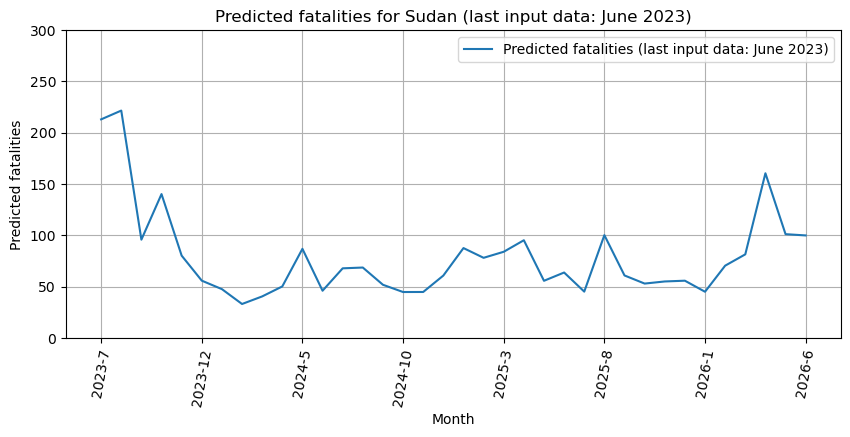

In [55]:
# Create the line graph
df11.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [56]:
## Df12

In [57]:
LastInputData = 'July 2023'
Dataset = 'fatalities002_2023_07'
StartOfHistory = 'Aug 2023'
EndOfHistory =  'Jul 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_07_t01/cm/sb/main_mean?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df12=pd.DataFrame(master_list)
df12

,country_id,month_id,name,gwcode,isoab,year,month,main_mean
0,245,524,Sudan,625,SDN,2023,8,224.9500
1,245,525,Sudan,625,SDN,2023,9,225.3951
2,245,526,Sudan,625,SDN,2023,10,126.8743
3,245,527,Sudan,625,SDN,2023,11,144.4965
4,245,528,Sudan,625,SDN,2023,12,105.3983
5,245,529,Sudan,625,SDN,2024,1,83.9878
6,245,530,Sudan,625,SDN,2024,2,64.2507
7,245,531,Sudan,625,SDN,2024,3,98.3648
8,245,532,Sudan,625,SDN,2024,4,64.5128
9,245,533,Sudan,625,SDN,2024,5,124.3623


In [58]:
df12[f'{Dataset}'] = df12['main_mean']
df12['Date'] = df12['year'].astype(str) +'-'+ df12['month'].astype(str)
df12

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,fatalities002_2023_07,Date
0,245,524,Sudan,625,SDN,2023,8,224.9500,224.9500,2023-8
1,245,525,Sudan,625,SDN,2023,9,225.3951,225.3951,2023-9
2,245,526,Sudan,625,SDN,2023,10,126.8743,126.8743,2023-10
3,245,527,Sudan,625,SDN,2023,11,144.4965,144.4965,2023-11
4,245,528,Sudan,625,SDN,2023,12,105.3983,105.3983,2023-12
5,245,529,Sudan,625,SDN,2024,1,83.9878,83.9878,2024-1
6,245,530,Sudan,625,SDN,2024,2,64.2507,64.2507,2024-2
7,245,531,Sudan,625,SDN,2024,3,98.3648,98.3648,2024-3
8,245,532,Sudan,625,SDN,2024,4,64.5128,64.5128,2024-4
9,245,533,Sudan,625,SDN,2024,5,124.3623,124.3623,2024-5


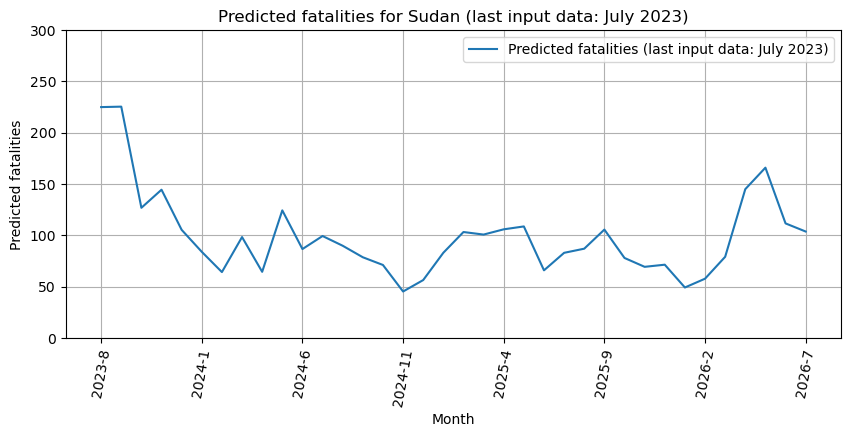

In [59]:
# Create the line graph
df12.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

In [60]:
## Df13

In [61]:
LastInputData = 'Aug 2023'
Dataset = 'fatalities002_2023_08'
StartOfHistory = 'Sep 2023'
EndOfHistory =  'Aug 2026'

VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_08_t01/cm/sb/main_mean?iso=SDN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df13=pd.DataFrame(master_list)
df13

,country_id,month_id,name,gwcode,isoab,year,month,main_mean
0,245,525,Sudan,625,SDN,2023,9,247.4071
1,245,526,Sudan,625,SDN,2023,10,273.6585
2,245,527,Sudan,625,SDN,2023,11,111.1488
3,245,528,Sudan,625,SDN,2023,12,146.3645
4,245,529,Sudan,625,SDN,2024,1,115.1377
5,245,530,Sudan,625,SDN,2024,2,91.2425
6,245,531,Sudan,625,SDN,2024,3,98.6537
7,245,532,Sudan,625,SDN,2024,4,110.5310
8,245,533,Sudan,625,SDN,2024,5,153.4317
9,245,534,Sudan,625,SDN,2024,6,149.0722


In [62]:
df13[f'{Dataset}'] = df13['main_mean']
df13['Date'] = df13['year'].astype(str) +'-'+ df13['month'].astype(str)
df13

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,fatalities002_2023_08,Date
0,245,525,Sudan,625,SDN,2023,9,247.4071,247.4071,2023-9
1,245,526,Sudan,625,SDN,2023,10,273.6585,273.6585,2023-10
2,245,527,Sudan,625,SDN,2023,11,111.1488,111.1488,2023-11
3,245,528,Sudan,625,SDN,2023,12,146.3645,146.3645,2023-12
4,245,529,Sudan,625,SDN,2024,1,115.1377,115.1377,2024-1
5,245,530,Sudan,625,SDN,2024,2,91.2425,91.2425,2024-2
6,245,531,Sudan,625,SDN,2024,3,98.6537,98.6537,2024-3
7,245,532,Sudan,625,SDN,2024,4,110.5310,110.5310,2024-4
8,245,533,Sudan,625,SDN,2024,5,153.4317,153.4317,2024-5
9,245,534,Sudan,625,SDN,2024,6,149.0722,149.0722,2024-6


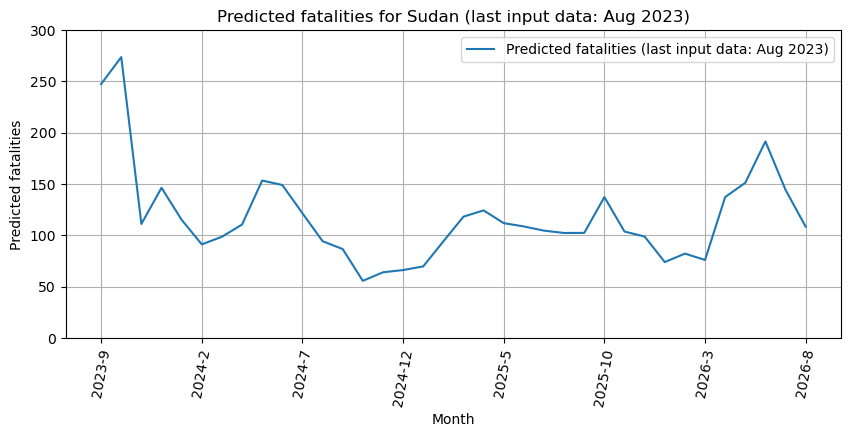

In [63]:
# Create the line graph
df13.plot(y=f'{Dataset}', x='Date', label=f"Predicted fatalities (last input data: {LastInputData})", figsize=(10, 4))

# Customize the graph
plt.title(f"Predicted fatalities for {country_name} (last input data: {LastInputData})")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities")
plt.grid()
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 300])

plt.savefig(f'/Users/angli742/Desktop/Prediction_{Dataset}_{country_name}.png', bbox_inches='tight')
plt.show()

# Plot all

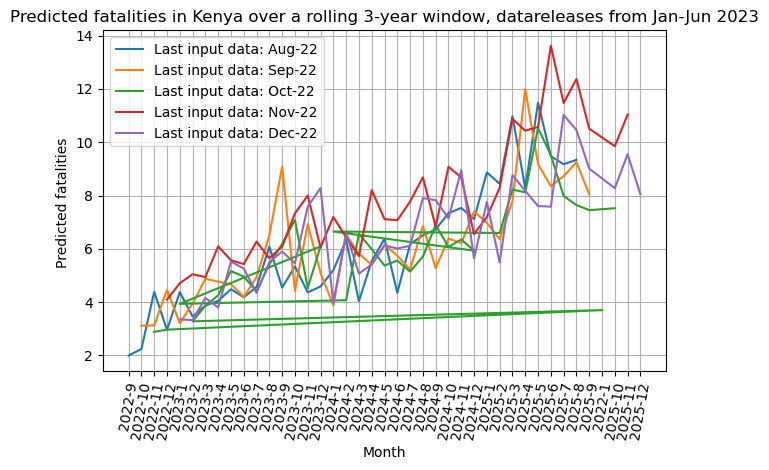

In [64]:
# Create the line graphs for each data frame
plt.plot(df1['Date'], df1['fatalities001_2022_08'], label='Last input data: Aug-22')
plt.plot(df2['Date'], df2['fatalities001_2022_09'], label='Last input data: Sep-22')
plt.plot(df3['Date'], df3['fatalities001_2022_10'], label='Last input data: Oct-22')
plt.plot(df4['Date'], df4['fatalities001_2022_11'], label='Last input data: Nov-22')
plt.plot(df5['Date'], df5['fatalities001_2022_12'], label='Last input data: Dec-22')

#set_figwidth()
plt.rcParams["figure.figsize"] = (15, 5)


# Customize the graph
plt.title("Predicted fatalities in Kenya over a rolling 3-year window, datareleases from Jan-Jun 2023")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities ")

# Show the legend
plt.legend()

# Adjust the layout

plt.grid()

plt.tight_layout()

plt.savefig('Jan-Jun23.png')
plt.show()


In [65]:


#set_figwidth()
plt.rcParams["figure.figsize"] = (15, 5)


# Create the line graphs for each data frame
plt.plot(df4['Date'], df4['main_mean'], label='Last input data: Apr-23')
plt.plot(df5['Date'], df5['main_mean'], label='Last input data: May-23')
plt.plot(df6['Date'], df6['main_mean'], label='Last input data: Jun-23')


# Customize the graph
plt.title("Predicted fatalities in Kenya over a rolling 3-year window, datareleases from Apr-Jun 2023")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities ")

plt.grid()

# Show the legend
plt.legend()

# Adjust the layout

plt.tight_layout()

plt.savefig('Sudan.png')
plt.show()

KeyError: 'main_mean'